In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [112]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
df.shape

(7043, 21)

In [114]:
df = df.drop(columns='customerID')

In [115]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [85]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#ValueError: Unable to parse string " " at position 488

In [88]:
num = df['TotalCharges'].iloc[488]
num

' '

In [89]:
df = df.drop(488)

In [90]:
df = df.replace(' ',np.nan)

In [91]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [92]:
df = df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

In [94]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [95]:
yes = df[df['Churn'] == 'Yes']
no = df[df['Churn'] == 'No']

In [96]:
print(yes.shape)
print(no.shape)

(1869, 20)
(5163, 20)


In [116]:
yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [97]:
no_sample = no.sample(n=1869)

In [98]:
print(yes.shape)
print(no_sample.shape)

(1869, 20)
(1869, 20)


In [99]:
df = pd.concat([no_sample,yes], axis=0)

In [100]:
df.shape

(3738, 20)

In [101]:
df['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [102]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)

In [103]:
column = df.columns.drop(['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
column
df_new = pd.get_dummies(df, columns=column, drop_first = True) 
df_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
2591,0,57,100.60,5611.70,0,1,1,1,0,1,...,1,0,1,0,0,1,0,1,0,0
4153,0,27,20.30,595.05,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
464,1,72,116.05,8404.90,1,1,0,1,0,1,...,1,0,1,0,1,1,0,0,0,0
4999,0,16,19.70,301.55,0,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5106,0,52,59.45,3043.70,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,12,59.80,727.80,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1
7026,0,9,44.20,403.35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7032,1,1,75.75,75.75,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
7034,0,67,102.95,6886.25,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,1


In [104]:
X = df_new.drop(columns='Churn_Yes')
y = df_new['Churn_Yes']

In [105]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_val = cross_val_score(lr,X,y,cv=5)
print('Log reg scores ',cross_val)

Log reg scores  [0.77540107 0.77005348 0.7526738  0.78045515 0.74966533]


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [107]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [108]:
lr.score(X_test,y_test)

0.7647058823529411

In [109]:
import seaborn as sns 

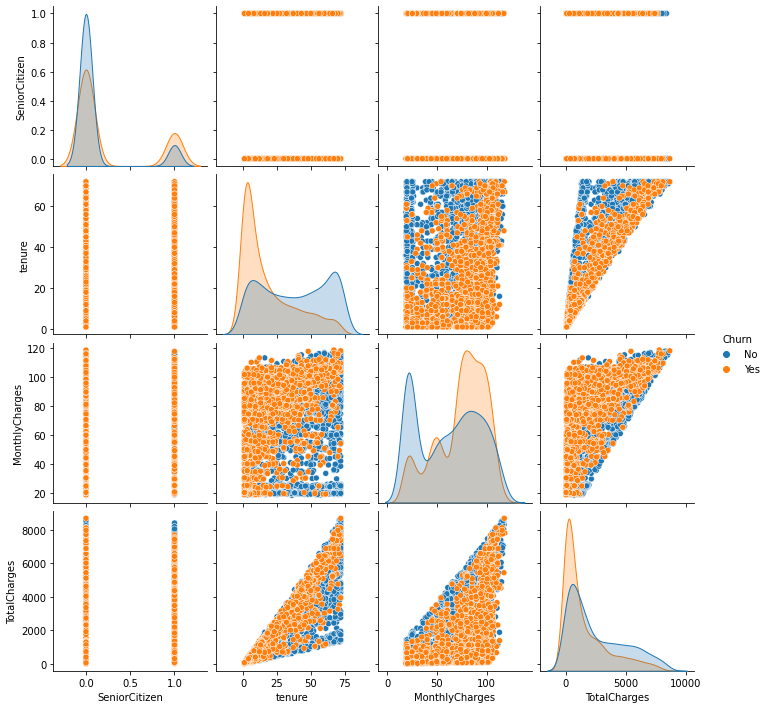

In [110]:
sns.pairplot(df,hue='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

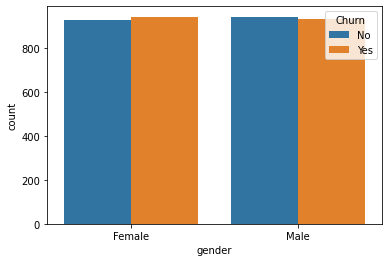

In [35]:
sns.countplot(x=df['gender'], hue=df['Churn'])

In [16]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

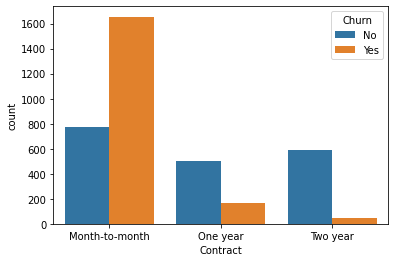

In [36]:
sns.countplot(x=df['Contract'],hue=df['Churn'])

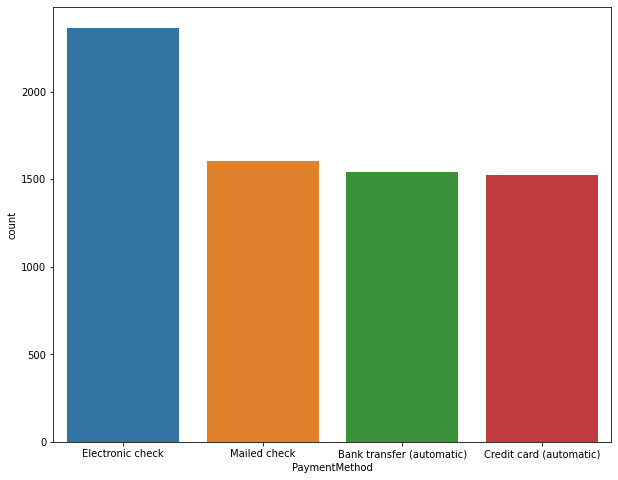

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['PaymentMethod'])
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

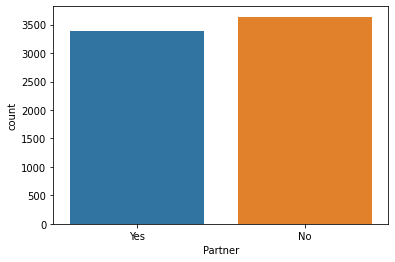

In [19]:
sns.countplot(x=df['Partner'])

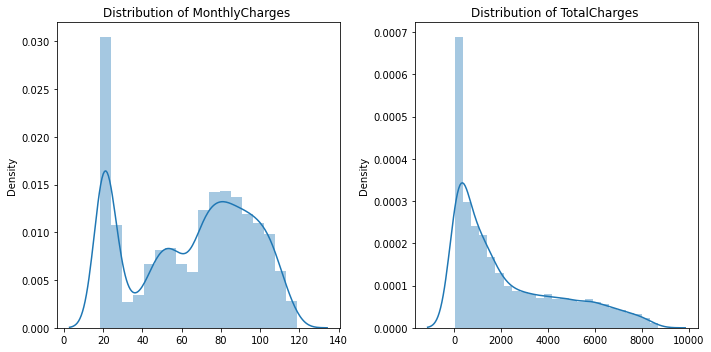

In [20]:
import warnings 
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(nrows =1,ncols=2,figsize=(10,5))
sns.distplot(x=df['MonthlyCharges'], ax=axs[0])
axs[0].set_title('Distribution of MonthlyCharges ')
sns.distplot(x=df['TotalCharges'], ax=axs[1])
axs[1].set_title('Distribution of TotalCharges ')
plt.tight_layout()

plt.show()

Tenure Mean : 32.421786120591584


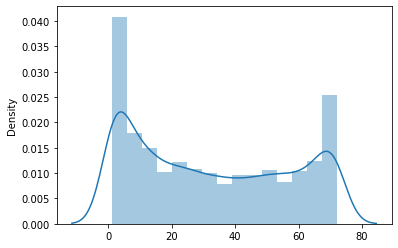

In [21]:
sns.distplot(x=df['tenure'])
print('Tenure Mean :',df['tenure'].mean())

In [22]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [23]:
df = df.drop(columns='customerID')

In [24]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print('*************************')
        print(column,'\n')
        print(df[column].value_counts())

*************************
gender 

Male      3549
Female    3483
Name: gender, dtype: int64
*************************
Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64
*************************
Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64
*************************
PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64
*************************
MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
*************************
InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
*************************
OnlineSecurity 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
*************************
OnlineBackup 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
*****************

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [27]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline


In [28]:
column = df.columns.drop(['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
column
df_new = pd.get_dummies(df, columns=column, drop_first = True) 

df_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_new.drop(columns='Churn_Yes')
y = df_new['Churn_Yes']

In [32]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [34]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [35]:
"""for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    
    
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------') """

"for model in models:\n\n    cv_score = cross_val_score(model, X, y, cv=5)\n    mean_accuracy = sum(cv_score)/len(cv_score)\n    mean_accuracy = mean_accuracy*100\n    mean_accuracy = round(mean_accuracy, 2)\n    \n    \n    print('Cross Validation accuracies for the',model,'=', cv_score)\n    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')\n    print('---------------------------------------------------------------') "

In [ ]:
cv_score = cross_val_score(models[0], X, y, cv=5)


print("LR scores: ",cv_score)

In [ ]:
cv_score = cross_val_score(models[1], X, y, cv=5)
cv_score

In [44]:
kbest = SelectKBest(chi2, k=9)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.fit_transform(X_test, y_test)
selected_features = kbest.get_support(indices=True)
selected_features

array([ 1,  2,  3, 10, 20, 22, 24, 25, 28], dtype=int64)

In [37]:
df_new.iloc[:,selected_features]

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Electronic check
0,1,29.85,29.85,0,0,0,0,0,1
1,34,56.95,1889.50,0,0,0,1,0,0
2,2,53.85,108.15,0,0,0,0,0,0
3,45,42.30,1840.75,0,0,0,1,0,0
4,2,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,0,1,0,0
7039,72,103.20,7362.90,1,0,0,1,0,0
7040,11,29.60,346.45,0,0,0,0,0,1
7041,4,74.40,306.60,1,0,0,0,0,0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV


In [42]:
model = LogisticRegression()


In [43]:
param_grid = {'selectkbest__k': range(1,31),
              'selectkbest__score_func': [chi2]}

# Define the pipeline to use
pipeline = Pipeline([('selectkbest', SelectKBest()),
                     ('logreg', model)])

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'selectkbest__k': 19, 'selectkbest__score_func': <function chi2 at 0x000001DBFC1644C0>}
Best score: 0.8029247657958812


In [ ]:
X_train_kbest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(C=0.1, solver='liblinear',penalty='l1',max_iter=1000)
#lr.fit(X_train_kbest,y_train)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()

In [ ]:
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)

In [ ]:
print("Knn")
print("Accuracy on train data",knn.score(X_train,y_train))
print("Accuracy on test data",knn.score(X_test,y_test))
print("Logistic Regression")
print("Accuracy on train data",lr.score(X_train,y_train))
print("Accuracy on test data",lr.score(X_test,y_test))
print("SVM")
print("Accuracy on train data",svm.score(X_train,y_train))
print("Accuracy on test data",svm.score(X_test,y_test))
print("RF")
print("Accuracy on train data",rf.score(X_train,y_train))
print("Accuracy on test data",rf.score(X_test,y_test))
print("NB")
print("Accuracy on train data",nb.score(X_train,y_train))
print("Accuracy on test data",nb.score(X_test,y_test))


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

grid_search = GridSearchCV(lr, param_grid, cv=5, verbose=2)
grid_search.fit(X_train_kbest, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

cf = confusion_matrix(y_test, y_pred_lr)
print(cf)
print("LR accuracy:", accuracy_lr)
print("LR precision:", precision_lr)
print("LR recall:", recall_lr)
print("LR F1 score:", f1_score_lr)

In [ ]:
X_train_kbest.shape

In [ ]:
df.shape

In [ ]:
#column = df.drop(columns=['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])


In [ ]:
df_new.head()

In [ ]:
df_new.shape

In [ ]:
test = df_new.groupby('Churn_Yes').count()
test.head()

In [ ]:
X = df_new.drop(columns='Churn_Yes')
y = df_new['Churn_Yes']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

In [ ]:
params = {'n_neighbors' : np.arange(1,100)}

In [ ]:
grid_search = GridSearchCV(knn, params, cv=10)


In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the accuracy score
print("Accuracy score: ", grid_search.best_estimator_.score(X_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error


k_values = range(1, 40)

# Train the k-NN models for each k value and store the errors
errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

# Plot the k values against the errors
plt.figure(figsize=(15,6))
plt.plot(k_values, errors)
plt.xlabel('k')
plt.xticks(range(1,40))
plt.ylabel('Error')
plt.title('k-NN Error')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on train data: ', knn.score(X_train,y_train))
print('Accuracy on test data: ', knn.score(X_test,y_test))

In [ ]:
cv_scores = cross_val_score(knn,X,y,cv=5)
cv_scores

In [ ]:
#best K is 28 

knn_model = KNeighborsClassifier(n_neighbors=28)
knn_model.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)